# Milestone P2

[Milestone P2 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p2-project-proposal-and-initial-analyses)
# Milestone Objectives

The aims of this milestone are to enhance our familiarity with the dataset to achieve our ultimate goal of identifying pivotal movies. To accomplish this, we will follow a structured approach:

- **Data Exploration** : Interact with the dataset to gain insights and explore potential avenues for analyzing movies and identifying trends.

- **Data Cleaning** : Clean the dataset to retain only movies that possess the relevant features necessary for our analysis. This step ensures that we work with a refined and focused dataset.

- **Dataset Augmentation** : Enhance the dataset by incorporating additional features, as outlined in the ReadMe. Notably, we will include movie ratings, which are important for characterizing the popularity of movies.

- **Preliminary Analysis** : Conduct a concise and initial analysis to identify pivotal movies. This analysis will provide valuable insights into the significance of certain movies within the dataset.






## Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from implementations import *

In [2]:
# Data Path
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'
MOVIES_DATASET = MOVIES_FOLDER+"movie.metadata.tsv"

# Load Data
df = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                  'box_office','runtime','lang','countries','genres'])

# 1) What's in the data?

First, let's take a global view of what we have in the CMU movie dataset. We'll explore the dataset's overall structure, key variables, and initial characteristics to better understand the scope and content of the data before delving into specific analyses and preprocessing steps.

### a) Let's analyse how many movie the dataset contain

In [3]:
print("We have a total number of {} movies in the dataset ".format(len(df)))


We have a total number of 81741 movies in the dataset 


### b) But what features do we have ?


In [4]:
print(df.columns)

Index(['id_wiki', 'id_freebase', 'name', 'date', 'box_office', 'runtime',
       'lang', 'countries', 'genres'],
      dtype='object')


- **id_wiki:** This is a unique identifier associated with each movie on Wikipedia.

- **id_freebase:** This is a unique identifier associated with each movie on Freebase. This feature provides no useful information, as databases from Freebase were merged with Wikipedia in 2014.

- **name:** Title of the movie.

- **date:** Date of release of the movie.

- **box_office:** Contains the box office revenue in dollars.

- **runtime:** Duration of the film in minutes.

- **lang:** This column indicates the languages used in the original (VO) movie.

- **countries:** This column is associated with the country of production of the movie.

- **genres:** Genres associated with the film.


Let's see an example with our favorite movie saga: *Twilight*.

But where are our precious movies? As the dataframe contains 80,000 movies, we need to find which ones contain the word "Twilight" in the title name.


In [5]:

result = df[df['name'].str.contains('twilight', case=False, na=False)]
display(' Movie title that contains Twilight \n', result['name'] )

' Movie title that contains Twilight \n'

2673                                     Women of Twilight
3241                              Twilight's Last Gleaming
7447                           Twilight of the Dark Master
9863                                      Twilight Dancers
9912             The Twilight Saga: Breaking Dawn - Part 1
13863    Memories of Berlin: The Twilight of Weimar Cul...
14223                                             Twilight
18376                                       Tokyo Twilight
19856                             Twilight Zone: The Movie
27507                              The Kingdom of Twilight
33617                          Twilight of the Cockroaches
33659                                             Twilight
35389                                     Twilight Theater
41159                                    Twilight of Honor
41604                                 The Twilight Samurai
42224                              Sir Galahad of Twilight
42881                                 Twilight of the Go

In [6]:
print( 'We have a total of {} movie that contain Twilight in their title'.format(len(result)))

We have a total of 29 movie that contain Twilight in their title


That's more than we expected! Anyway, I see my favorite one: *The Twilight Saga: Breaking Dawn - Part 1*. Let's analyze the features of this movie.


In [7]:
FILM_NAME='The Twilight Saga: Breaking Dawn - Part 1'

print('Released date: {} \n' .format(df[
    df['name']==FILM_NAME]['date'].values[0]))

print('Genres: {} \n'.format(df[
    df['name']==FILM_NAME]['genres'].values[0]))

print('Countries of production: {} \n'.format(df[
    df['name']==FILM_NAME]['countries'].values[0]))


print('Box office revenues : {:,.0f}$ \n'.format(df[
    df['name']==FILM_NAME]['box_office'].values[0]))

print('Duration : {:.0f} minutes \n'.format(df[
    df['name']==FILM_NAME]['runtime'].values[0]))

print('Language adaptation :{}' .format(df[
    df['name']==FILM_NAME]['lang'].values[0]))

Released date: 2011-11-16 

Genres: {"/m/07s9rl0": "Drama", "/m/01hmnh": "Fantasy", "/m/03k9fj": "Adventure", "/m/02b5_l": "Teen", "/m/03rzvv": "Romantic fantasy"} 

Countries of production: {"/m/09c7w0": "United States of America"} 

Box office revenues : 705,058,657$ 

Duration : 117 minutes 

Language adaptation :{"/m/02h40lc": "English Language"}


As we can see, some features are not that clean, like **genre, countries, and language adaptation**. These features will need to be treated in the second part.


### c) Overall Overview


After examining the features for the film *The Twilight Saga: Breaking Dawn - Part 1*, let's delve into a broader understanding of the dataset. Now, shifting our focus to the entire dataset, we aim to provide a comprehensive overview.


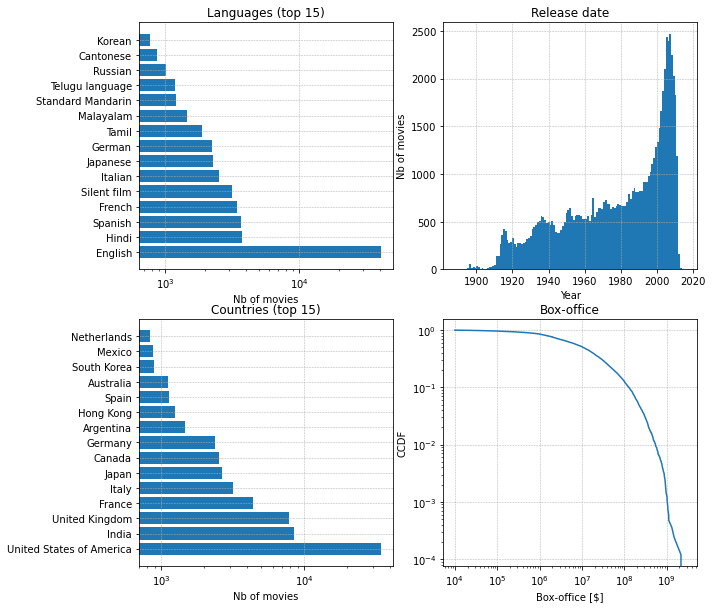

In [8]:
data_viz(df, israw=True)

# 2) Cleaning the data


This part focuses on cleaning the data. Indeed, cleaning data is an important step for accurate data analysis. It ensures the integrity of results, reduces the risk of errors, and promotes consistency in reporting. Clean data enhances data understanding, uncovering valuable insights and patterns. Moreover, it facilitates compatibility with other datasets, mitigates bias, and ensures compliance with industry regulations. In essence, data cleaning is an essential step that contributes to the overall quality and effectiveness of data-driven processes. But first things first, let's make a deep copy of the dataset before filtering.


In [9]:
movies = df.copy()

### a) Removing missing data :

First let's have a look at what is missing in the original dataframe *'df'*

In [10]:
generate_missing_info(df)

,Missing Data (%)
Column,
id_wiki,0.00
id_freebase,0.00
name,0.00
date,8.44
box_office,89.72
runtime,25.02
lang,0.00
countries,0.00
genres,0.00


In order to identify pivotal movies, some features of data are crucial. First is data linked to trend identification. To identify trends for movies, we need two features: the **date of release** and the **genres** of the movie. Then, we remove all movies that have either a missing date feature or a missing genres feature.


In [11]:
# Handle missing values
movies = data_missing(movies)

Now let's check if there are any duplicates. We define a duplicate pair as movies with the same name, release year, and runtime.


In [12]:
check_doublons(movies,['name'],'date','runtime')

Rows with real duplicates: 
                                     name        date  runtime
1412                       Landspeed: CKY        1999      NaN
4856   Indiana Jones and the Last Crusade  1989-05-24    127.0
5356                       Landspeed: CKY        1999      NaN
5872                    Secrets of Nature        1950      NaN
9965                      Little Big Horn  1951-06-15     86.0
13458                    Jeepers Creepers        1939      NaN
16448                 Moscow Strikes Back  1942-02-23     55.0
24940                   Secrets of Nature        1950      NaN
31701                    Facing the Music  1941-10-18     79.0
45846                 Moscow Strikes Back  1942-02-23     55.0
46001                    Jeepers Creepers        1939      NaN
49203  Indiana Jones and the Last Crusade  1989-05-24    127.0
51505                Yours, Mine and Ours  2005-11-23     88.0
61322                     Little Big Horn  1951-06-15     86.0
62250                      

Interesting! Looks like we have some duplicates. We'll merge them so that we keep all the relevant information. For example, let's look at the Indiana Jones movie.


In [13]:
display(movies[movies['name'] == 'Indiana Jones and the Last Crusade'])

,id_wiki,id_freebase,name,date,box_office,runtime,lang,countries,genres
4856,3184269,/m/0dnqr,Indiana Jones and the Last Crusade,1989-05-24,NaN,127.0,"{""/m/0349s"": ""Greek Language"", ""/m/04306rv"": ""...","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3m_6"": ""Costume Adventure"", ""/m/02kdv5..."
49203,51888,/m/0h_b6x1,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,{},{},"{""/m/03k9fj"": ""Adventure""}"


After merging :

In [14]:
movies = fuse_duplicates(movies, col_check=['name'], year='date', runtime='runtime',
                         col_len=['lang', 'countries', 'genres'], col_null=['box_office', 'runtime'])
display(movies[movies['name']=='Indiana Jones and the Last Crusade'])


Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------


,id_wiki,id_freebase,name,date,box_office,runtime,lang,countries,genres
4452,3184269,/m/0dnqr,Indiana Jones and the Last Crusade,1989-05-24,474171806.0,127.0,"{""/m/0349s"": ""Greek Language"", ""/m/04306rv"": ""...","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3m_6"": ""Costume Adventure"", ""/m/02kdv5..."


In [15]:
print('The remaining values of movies after this step is {}'.format(len(movies)))


The remaining values of movies after this step is 74830


### b) Changing the features format

Now that the missing data has been dropped, we will address unclear features in the dataset. Building on the example of 'Twilight' from part 1, we observed that the presentation of languages, countries, and genres needed improvement. Let's reorganize and standardize these features for better clarity. Additionally, we'll modify the date format to establish a consistent basis for every film in the dataset.


In [16]:
# Format data types
movies = data_format(movies)

Let's take a look to the refresh features

In [17]:
print('Released date: {} \n' .format( movies[
    movies['name']==FILM_NAME]['date'].values[0]))

print('Genres: {} \n'.format( movies[
    movies['name']==FILM_NAME]['genres'].values[0]))

print('Countries of production: {} \n'.format(    movies[
       movies['name']==FILM_NAME]['countries'].values[0]))
  

print('Language adaptation :{}' .format(movies[
        movies['name']==FILM_NAME]['lang'].values[0]))

Released date: 2011 

Genres: ['Drama', 'Fantasy', 'Adventure', 'Teen', 'Romantic fantasy'] 

Countries of production: ['USA'] 

Language adaptation :['English Language']


Nice! Now we see clearly the genre, countries of production, and language adaptation. Furthermore, we only keep the year the film has been released for our further analysis.

For the sake of simplicity, we rename the column 'date' to 'year' and the column 'box_office' to 'revenue'.


In [18]:
movies.rename(columns={'box_office': 'revenue'}, inplace=True)
movies.rename(columns={'date': 'year'}, inplace=True)


### c) Boundary definition

To ensure the accuracy of our data for analysis, it is crucial to define boundaries within the 'date' feature. Occasionally, incorrect data may be present, leading to inconsistencies. Let's identify and rectify such errors to maintain data integrity and ensure meaningful analysis.


In [19]:
display(movies[movies['year']<1800][['name','year']])

,name,year
57565,Hunting Season,1010


Turns out the Middle Ages had more drama than we thought, the first medieval blockbusters are here! But all jokes aside, let's clean it.


In [20]:
# Clean data, outliers and features
movies = data_clean(movies)


### d) Filtering data

The last step is to filter our data. Indeed, we want to focus our analysis only on movies produced in the USA and in the English language.


In [21]:
movies_all= movies.copy()
# Filter data
movies = data_filter(movies)

Let's look at what is remaining and what distributions look likes

In [22]:
generate_missing_info(movies)

,Missing Data (%)
Column,
id_wiki,0.00
id_freebase,0.00
name,0.00
year,0.00
revenue,77.27
runtime,11.37
lang,0.00
countries,0.00
genres,0.00


In [23]:
display(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29828 entries, 0 to 74827
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      29828 non-null  int64  
 1   id_freebase  29828 non-null  object 
 2   name         29828 non-null  object 
 3   year         29828 non-null  int32  
 4   revenue      6779 non-null   float64
 5   runtime      26436 non-null  object 
 6   lang         29828 non-null  object 
 7   countries    29828 non-null  object 
 8   genres       29828 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 2.2+ MB


None

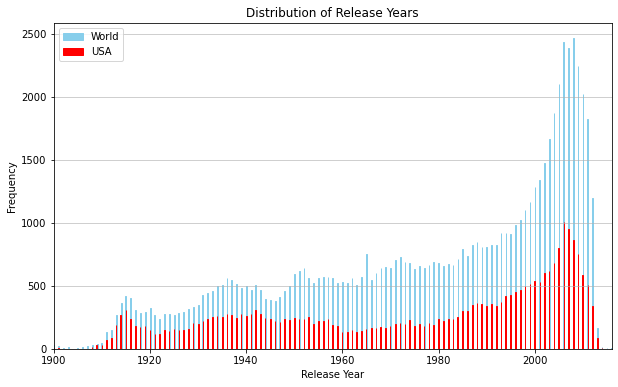

In [24]:
# Looking at distribution of release years

plt.figure(figsize=(10, 6))
plt.hist(movies_all['year'], bins=1000, color='skyblue', edgecolor='skyblue', label='World')
plt.hist(movies['year'], bins=1000, color='red', edgecolor='red', label='USA')
plt.xlabel("Release Year")
plt.xlim(1900, 2016)
plt.ylabel("Frequency")
plt.title("Distribution of Release Years")
plt.grid(axis='y', alpha=0.75)
plt.legend()
plt.show()


It seems that a lot of revenue data is missing. Let's examine the distribution along the years.



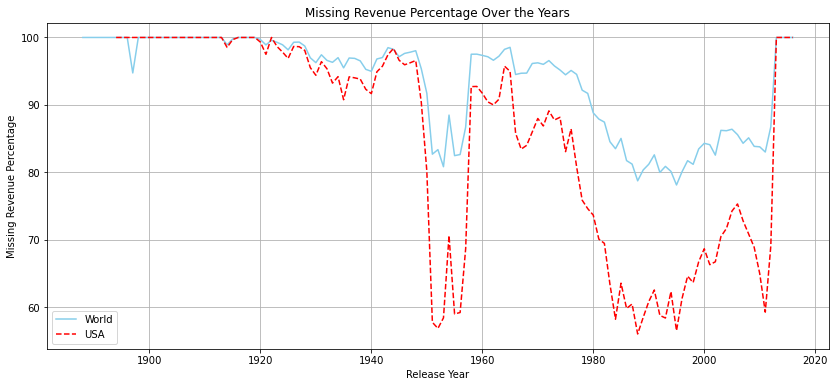

In [25]:
# Let's compare missing revenue data for some countries

missing_revenue_all = calculate_missing_percentage(movies_all, 'year', 'revenue')
missing_revenue_USA = calculate_missing_percentage(movies, 'year', 'revenue')


plt.figure(figsize=(14, 6))

plt.plot(missing_revenue_all.index, missing_revenue_all["revenue"], linestyle='-', color='skyblue', label='World')
plt.plot(missing_revenue_USA.index, missing_revenue_USA["revenue"], linestyle='--', color='r', label='USA')

plt.xlabel("Release Year")
plt.ylabel("Missing Revenue Percentage")
plt.title("Missing Revenue Percentage Over the Years")
plt.grid()
plt.legend()
plt.show()


As seen in the graph above, the missing value percentage for revenue is relatively high across all years (although the USA-only data is cleaner). We will try to address this using additional datasets (cf README).


# 3) Enrich Data


As seen in the previous part a lot data is missing for the revenue column. Furthermore, for future analysis of pivotal movies (cf README), we would like to have a review feature. This feature will take value from 0 to 10 and will be linked to another feature : number of reviews available.

In [26]:
MOVIE_STATS = DATA_PATH + 'movie-stats/movies_stats.csv'
MOVIE_LENS = DATA_PATH +'movie_lens/movies_lens.csv'


### a) Loading and cleaning movie-stats

In [27]:
# Loading MovieStats movies df

movies_stats_vanilla = pd.read_csv(MOVIE_STATS)
movies_stats_vanilla.drop(columns=
                          ['genre', 'released', 'director', 'writer',
                           'star', 'company', 'rating', 'budget'], 
                          inplace=True)
movies_stats_vanilla = movies_stats_vanilla.rename(columns={
                                                   'gross': 'revenue',
                                                   'country': 'countries',
                                                   'score': 'review',
                                                   'votes': 'nbr_review'})
display(movies_stats_vanilla.sample(5))
display(movies_stats_vanilla.shape)
display(movies_stats_vanilla.info())
generate_missing_info(movies_stats_vanilla)


,name,year,review,nbr_review,countries,revenue,runtime
5209,Charlie Bartlett,2007,7.0,64000.0,United States,5254986.0,97.0
6841,Dragon Blade,2015,6.0,19000.0,China,122606884.0,127.0
3454,Austin Powers: the Spy Who Shagged Me,1999,6.6,221000.0,United States,312016928.0,95.0
2710,Mr. Holland's Opus,1995,7.3,36000.0,United States,106269971.0,143.0
3462,"Girl, Interrupted",1999,7.3,169000.0,Germany,48350205.0,127.0


(7668, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        7668 non-null   object 
 1   year        7668 non-null   int64  
 2   review      7665 non-null   float64
 3   nbr_review  7665 non-null   float64
 4   countries   7665 non-null   object 
 5   revenue     7479 non-null   float64
 6   runtime     7664 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 419.5+ KB


None

,Missing Data (%)
Column,
name,0.00
year,0.00
review,0.04
nbr_review,0.04
countries,0.04
revenue,2.46
runtime,0.05


- Checking release year distribution and country representation

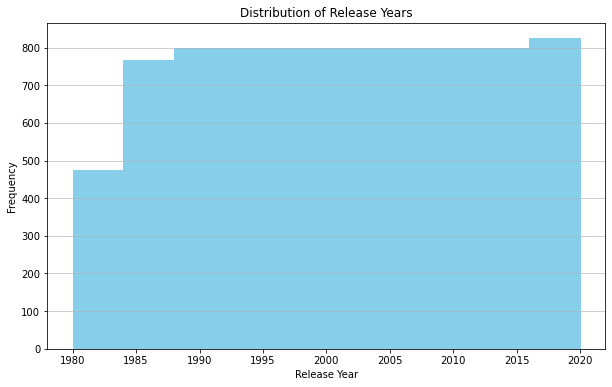

United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Australia           92
Japan               81
India               62
Italy               61
Spain               47
Name: countries, dtype: int64

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(movies_stats_vanilla['year'], color='skyblue', edgecolor='skyblue')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Release Years")
plt.grid(axis='y', alpha=0.75)
plt.show()

display(movies_stats_vanilla['countries'].value_counts().head(10))



- Keep only relevant rows: positive box office and USA only, checking date and runtime.


In [29]:


movies_stats = movies_stats_vanilla.copy(deep=True)

movies_stats = movies_stats.drop(movies_stats.index[movies_stats['year']<1800])
movies_stats.loc[movies_stats['runtime'] < 0, 'runtime'] = 0
movies_stats['runtime'] = movies_stats['runtime'].replace(0, pd.NA)

zero_data = movies_stats[(movies_stats.revenue <= 0)|(movies_stats.revenue.isna())|(movies_stats['countries']!='United States')]
movies_stats.drop(zero_data.index,inplace=True)
display(movies_stats.sample(5))
display(movies_stats.shape)
display(movies_stats.info())
generate_missing_info(movies_stats)


,name,year,review,nbr_review,countries,revenue,runtime
539,The Muppets Take Manhattan,1984,6.9,20000.0,United States,25534703.0,94.0
5252,The Strangers,2008,6.2,121000.0,United States,82410456.0,86.0
6094,Project X,2012,6.6,193000.0,United States,102731865.0,88.0
1682,Child's Play 2,1990,5.9,47000.0,United States,35763605.0,84.0
5717,Killers,2010,5.5,89000.0,United States,98159963.0,100.0


(5377, 7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7659
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        5377 non-null   object 
 1   year        5377 non-null   int64  
 2   review      5377 non-null   float64
 3   nbr_review  5377 non-null   float64
 4   countries   5377 non-null   object 
 5   revenue     5377 non-null   float64
 6   runtime     5376 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 336.1+ KB


None

,Missing Data (%)
Column,
name,0.00
year,0.00
review,0.00
nbr_review,0.00
countries,0.00
revenue,0.00
runtime,0.02


- Check if there are any duplicates

In [30]:
display(check_doublons(movies_stats, ['name'], 'year', 'runtime'))


No duplicates
--------------------------------------------------------------------------------


None

Perfect now the first additional dataset is clean(er) !

### b) Loading and cleaning movie lens dataset

- Loading Lens movies df

In [31]:
movies_lens_vanilla = pd.read_csv(MOVIE_LENS, usecols=['title', 'release_date', 'production_countries', 'revenue', 'runtime',
                                                      'vote_average', 'vote_count'])
movies_lens_vanilla = movies_lens_vanilla.rename(columns={'production_countries': 'countries',                                                     
                                                         'title': 'name',
                                                         'vote_average': 'review',
                                                         'vote_count': 'nbr_review'})
display(movies_lens_vanilla.sample(5))
display(movies_lens_vanilla.shape)
display(movies_lens_vanilla.info())


,countries,release_date,revenue,runtime,name,review,nbr_review
21315,"[{'iso_3166_1': 'ZA', 'name': 'South Africa'},...",2013-03-07,0.0,85.0,Vehicle 19,5.0,229.0
9902,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1977-08-11,110.0,110.0,A Special Day,7.7,79.0
26540,"[{'iso_3166_1': 'US', 'name': 'United States o...",1951-12-14,0.0,103.0,Starlift,5.8,2.0
34542,"[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_...",1965-03-22,0.0,91.0,Six Days a Week,0.0,0.0
12155,"[{'iso_3166_1': 'US', 'name': 'United States o...",1949-12-29,0.0,82.0,The Reckless Moment,6.9,21.0


(45466, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   countries     45463 non-null  object 
 1   release_date  45379 non-null  object 
 2   revenue       45460 non-null  float64
 3   runtime       45203 non-null  float64
 4   name          45460 non-null  object 
 5   review        45460 non-null  float64
 6   nbr_review    45460 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.4+ MB


None

- Keep only relevant columns, check budget and runtime

In [32]:
movies_lens = movies_lens_vanilla.copy(deep=True)
zero_data = movies_lens[(movies_lens.revenue <= 0)|(movies_lens.revenue.isna()|movies_lens.release_date.isna())]
movies_lens.drop(zero_data.index,inplace=True)
movies_lens.reset_index(drop=True, inplace=True)

movies_lens.loc[:, 'year'] = movies_lens['release_date'].str.split('-', expand=True)[0]
movies_lens.loc[:, 'year'] = movies_lens['year'].astype(int)
movies_lens = movies_lens.drop(columns='release_date')


movies_lens.loc[movies_lens['runtime'] < 0, 'runtime'] = 0
movies_lens['runtime'] = movies_lens['runtime'].replace(0, pd.NA)

movies_lens['year'] = movies_lens['year'].astype(int)
movies_lens['runtime'] = pd.to_numeric(movies_lens['runtime'], errors='coerce')



display(movies_lens.sample(5))
display(movies_lens.shape)
display(movies_lens.info())



,countries,revenue,runtime,name,review,nbr_review,year
4516,"[{'iso_3166_1': 'DK', 'name': 'Denmark'}]",5405313.0,106.0,The One and Only,6.2,18.0,1999
938,"[{'iso_3166_1': 'US', 'name': 'United States o...",27281507.0,85.0,The Muppet Christmas Carol,7.2,217.0,1992
2399,"[{'iso_3166_1': 'US', 'name': 'United States o...",2955917.0,92.0,976-EVIL,4.9,33.0,1988
5056,"[{'iso_3166_1': 'US', 'name': 'United States o...",559852396.0,106.0,Cars 2,5.8,2088.0,2011
983,"[{'iso_3166_1': 'ZA', 'name': 'South Africa'},...",60000000.0,109.0,The Gods Must Be Crazy,7.1,251.0,1980


(7407, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   countries   7407 non-null   object 
 1   revenue     7407 non-null   float64
 2   runtime     7380 non-null   float64
 3   name        7407 non-null   object 
 4   review      7407 non-null   float64
 5   nbr_review  7407 non-null   float64
 6   year        7407 non-null   int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 376.3+ KB


None

In [33]:
# Handling format
movies_lens['countries'] = movies_lens['countries'].apply(lambda x: [country['name'] for country in ast.literal_eval(x)] if pd.notna(x) else [])

# Handle multi-countries movies to keep only one country per movie (prioritize USA above others)
movies_lens = separate_values_biased(movies_lens, 'countries', 'United States of America')

display(movies_lens.sample(5))
display(movies_lens.shape)
display(movies_lens.info())


,countries,revenue,runtime,name,review,nbr_review,year
5801,United States of America,1.274219e+09,102.0,Frozen,7.3,5440.0,2013
3265,France,3.938800e+04,95.0,Au Hasard Balthazar,7.8,74.0,1966
1009,United States of America,4.500000e+06,99.0,Suspicion,7.1,140.0,1941
2,United States of America,8.145216e+07,127.0,Waiting to Exhale,6.1,34.0,1995
745,United States of America,3.161122e+07,115.0,For Richer or Poorer,5.6,43.0,1997


(7407, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7407 entries, 0 to 7406
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   countries   7255 non-null   object 
 1   revenue     7407 non-null   float64
 2   runtime     7380 non-null   float64
 3   name        7407 non-null   object 
 4   review      7407 non-null   float64
 5   nbr_review  7407 non-null   float64
 6   year        7407 non-null   int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 376.3+ KB


None

- Keep only the USA

In [34]:
movies_lens = movies_lens[movies_lens['countries']=='United States of America'].drop(
columns='countries')

display(movies_lens.sample(5))
display(movies_lens.shape)
display(movies_lens.info())



,revenue,runtime,name,review,nbr_review,year
1652,28900000.0,158.0,The Guns of Navarone,7.3,191.0,1961
5456,161772375.0,138.0,Flight,6.5,2449.0,2012
5814,149295601.0,121.0,Lone Survivor,7.4,1549.0,2013
3672,57231524.0,110.0,Madea's Family Reunion,6.0,77.0,2006
3011,7897645.0,96.0,Coffee and Cigarettes,6.9,216.0,2003


(5623, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5623 entries, 0 to 7396
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   revenue     5623 non-null   float64
 1   runtime     5623 non-null   float64
 2   name        5623 non-null   object 
 3   review      5623 non-null   float64
 4   nbr_review  5623 non-null   float64
 5   year        5623 non-null   int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 285.5+ KB


None

- Check if there are any duplicates

In [35]:
display(check_doublons(movies_lens, ['name'], 'year', 'runtime'))


Rows with real duplicates: 
                                             name  year  runtime
415                            A Farewell to Arms  1932     89.0
2301                                Clockstoppers  2002     94.0
2444  Pokémon 4Ever: Celebi - Voice of the Forest  2001     75.0
2548              Confessions of a Dangerous Mind  2002    113.0
4721                           A Farewell to Arms  1932     89.0
6692                                Clockstoppers  2002     94.0
6695              Confessions of a Dangerous Mind  2002    113.0
7381  Pokémon 4Ever: Celebi - Voice of the Forest  2001     75.0
--------------------------------------------------------------------------------


None

In [36]:
movies_lens = fuse_duplicates(movies_lens, col_check=['name'], year='year', runtime='runtime',
                         col_len=[], col_null=['revenue', 'review', 'nbr_review'])
check_doublons(movies_lens, ['name'], 'year', 'runtime')


Fusing duplicates: 
Duplicates fused successfully.
--------------------------------------------------------------------------------
No duplicates
--------------------------------------------------------------------------------


- Check release year distribution

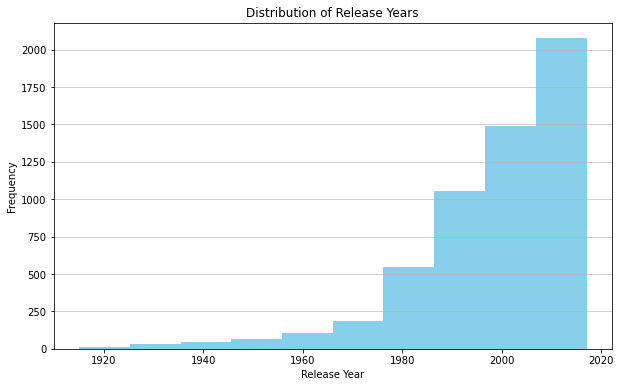

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(movies_lens['year'], color='skyblue', edgecolor='skyblue')
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Distribution of Release Years")
plt.grid(axis='y', alpha=0.75)
plt.show()


### c) Merging the two extra dataframes

Now that the two extra datasets are clean, let's merge them into the annex dataframe.

In [38]:
annex = pd.merge(movies_stats, movies_lens, how='outer', on=['name', 'year', 'runtime'])

display(annex.sample(5))
display(annex.shape)
display(annex.info())


,name,year,review_x,nbr_review_x,countries,revenue_x,runtime,revenue_y,review_y,nbr_review_y
3960,The Taking of Pelham 123,2009,6.4,189000.0,United States,150166126.0,106.0,NaN,NaN,NaN
187,Tex,1982,6.5,2000.0,United States,7400000.0,103.0,NaN,NaN,NaN
2421,Great Expectations,1998,6.8,52000.0,United States,55494066.0,111.0,55494066.0,6.4,131.0
3668,Teeth,2007,5.4,42000.0,United States,2340110.0,94.0,NaN,NaN,NaN
2429,BASEketball,1998,6.5,58000.0,United States,7027290.0,103.0,7027290.0,5.9,150.0


(8136, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8135
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8136 non-null   object 
 1   year          8136 non-null   int64  
 2   review_x      5377 non-null   float64
 3   nbr_review_x  5377 non-null   float64
 4   countries     5377 non-null   object 
 5   revenue_x     5377 non-null   float64
 6   runtime       8135 non-null   float64
 7   revenue_y     5619 non-null   float64
 8   review_y      5619 non-null   float64
 9   nbr_review_y  5619 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 699.2+ KB


None

- Let's merge the revenues columns

In [39]:
annex['revenue'] = annex.apply(lambda row: fuse_columns(row[f'revenue_x'], row[f'revenue_y'], 'revenue'), axis=1)

annex = annex.drop(columns=['revenue_x', 'revenue_y', 'countries'])
display(annex.sample(5))
display(annex.shape)
display(annex.info())


,name,year,review_x,nbr_review_x,runtime,review_y,nbr_review_y,revenue
6715,What the #$*! Do We (K)now!?,2004,NaN,NaN,109.0,5.8,34.0,10000000.0
1495,Encino Man,1992,5.8,38000.0,88.0,5.6,197.0,40693477.0
7074,Towelhead,2008,NaN,NaN,111.0,6.5,45.0,367638.0
6049,Shaft,2000,NaN,NaN,99.0,5.5,316.0,107196498.0
7090,Nick and Norah's Infinite Playlist,2008,NaN,NaN,89.0,6.4,387.0,32973937.0


(8136, 8)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8135
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8136 non-null   object 
 1   year          8136 non-null   int64  
 2   review_x      5377 non-null   float64
 3   nbr_review_x  5377 non-null   float64
 4   runtime       8135 non-null   float64
 5   review_y      5619 non-null   float64
 6   nbr_review_y  5619 non-null   float64
 7   revenue       8136 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 572.1+ KB


None

- Let's merge the reviews columns.

In [40]:
annex = fuse_scores(annex, 'review_x', 'review_y', 'nbr_review_x', 'nbr_review_y')
display(annex.sample(5))
display(annex.shape)
display(annex.info())
display(annex[annex['review']<=0])
display(annex[annex['nbr_review']<=0])


,name,year,runtime,revenue,review,nbr_review
6650,The Machinist,2004,101.0,8203235.0,7.300000,1280.0
4370,Chronicle,2012,84.0,135818048.5,6.996791,244965.0
7070,The Unholy Three,1925,86.0,704000.0,5.800000,11.0
6714,When Will I Be Loved,2004,81.0,159429.0,4.200000,12.0
693,Brighton Beach Memoirs,1986,108.0,11957943.0,6.800000,3400.0


(8136, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8135
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        8136 non-null   object 
 1   year        8136 non-null   int64  
 2   runtime     8135 non-null   float64
 3   revenue     8136 non-null   float64
 4   review      8122 non-null   float64
 5   nbr_review  8122 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 444.9+ KB


None

,name,year,runtime,revenue,review,nbr_review


,name,year,runtime,revenue,review,nbr_review


- Check if there are any duplicates.

In [41]:
check_doublons(annex, ['name'], 'year', 'runtime')


No duplicates
--------------------------------------------------------------------------------


In [42]:
display(annex.info())
display(movies.info())
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8136 entries, 0 to 8135
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        8136 non-null   object 
 1   year        8136 non-null   int64  
 2   runtime     8135 non-null   float64
 3   revenue     8136 non-null   float64
 4   review      8122 non-null   float64
 5   nbr_review  8122 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 444.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29828 entries, 0 to 74827
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      29828 non-null  int64  
 1   id_freebase  29828 non-null  object 
 2   name         29828 non-null  object 
 3   year         29828 non-null  int32  
 4   revenue      6779 non-null   float64
 5   runtime      26436 non-null  object 
 6   lang         29828 non-null  object 
 7   countries    29828 non-null  object 
 8   genres       29828 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 2.2+ MB


None

Now that annex is properly merged let's do the final merge with movies dataframe

In [43]:
movies2 = pd.merge(movies, annex, on=['name', 'year', 'runtime'], how='left')
display(movies2.sample(5))
display(movies2.shape)
display(movies2.info())


,id_wiki,id_freebase,name,year,revenue_x,runtime,lang,countries,genres,revenue_y,review,nbr_review
2721,1485962,/m/05567m,The Mask,1994,351583407.0,101.0,[English Language],[USA],"[Crime Fiction, Romance Film, Action, Fantasy,...",351583407.0,6.897872,359550.0
27711,3011117,/m/08kf7t,The Adventurer,1917,NaN,20.0,[English Language],[USA],"[Short Film, Silent film, Comedy, Black-and-wh...",NaN,NaN,NaN
24479,2833517,/m/085n6q,Two Days,2003,NaN,87.0,[English Language],[USA],"[Black comedy, Drama, Indie]",NaN,NaN,NaN
24573,88075,/m/0m313,Shakespeare in Love,1998,289317794.0,137.0,[English Language],"[USA, United Kingdom]","[Romantic comedy, Costume drama, Comedy-drama,...",NaN,NaN,NaN
21848,13309790,/m/03c1byz,I Passed for White,1960,NaN,92.0,[English Language],[USA],"[Romantic drama, Romance Film, Melodrama, Dram...",NaN,NaN,NaN


(29828, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29828 entries, 0 to 29827
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      29828 non-null  int64  
 1   id_freebase  29828 non-null  object 
 2   name         29828 non-null  object 
 3   year         29828 non-null  int32  
 4   revenue_x    6779 non-null   float64
 5   runtime      26436 non-null  float64
 6   lang         29828 non-null  object 
 7   countries    29828 non-null  object 
 8   genres       29828 non-null  object 
 9   revenue_y    2900 non-null   float64
 10  review       2898 non-null   float64
 11  nbr_review   2898 non-null   float64
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 2.8+ MB


None

- Fusing the box office data

In [44]:
movies2['revenue'] = movies2.apply(lambda row: fuse_columns(row[f'revenue_x'], row[f'revenue_y'], 'revenue'), axis=1)

movies2 = movies2.drop(columns=['revenue_x', 'revenue_y'])

display(movies2.sample(5))
display(movies2.shape)
display(movies2.info())



,id_wiki,id_freebase,name,year,runtime,lang,countries,genres,review,nbr_review,revenue
15122,30474049,/m/0g9y72x,Ticking Clock,2011,101.0,[English Language],[USA],"[Thriller, Crime Thriller, Action, Suspense, P...",NaN,NaN,<NA>
27992,728946,/m/03681w,When a Man Loves a Woman,1994,126.0,"[English Language, Thai Language]",[USA],"[Romantic drama, Romance Film, Marriage Drama,...",6.597978,21071.0,50021959.0
17862,3724309,/m/09xchw,Julius Caesar,1950,106.0,[English Language],[USA],[Drama],NaN,NaN,<NA>
25152,12513889,/m/02w9w0g,Gaydar,2002,20.0,[English Language],[USA],"[Short Film, Comedy]",NaN,NaN,<NA>
11969,5026667,/m/0c_gn5,Air Bud: Seventh Inning Fetch,2002,93.0,[English Language],"[USA, Canada]","[Children's/Family, Animal Picture, Sports, Ch...",NaN,NaN,<NA>


(29828, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29828 entries, 0 to 29827
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      29828 non-null  int64  
 1   id_freebase  29828 non-null  object 
 2   name         29828 non-null  object 
 3   year         29828 non-null  int32  
 4   runtime      26436 non-null  float64
 5   lang         29828 non-null  object 
 6   countries    29828 non-null  object 
 7   genres       29828 non-null  object 
 8   review       2898 non-null   float64
 9   nbr_review   2898 non-null   float64
 10  revenue      7285 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 2.6+ MB


None

- Vizualize improvements on missing revenue data post-merge

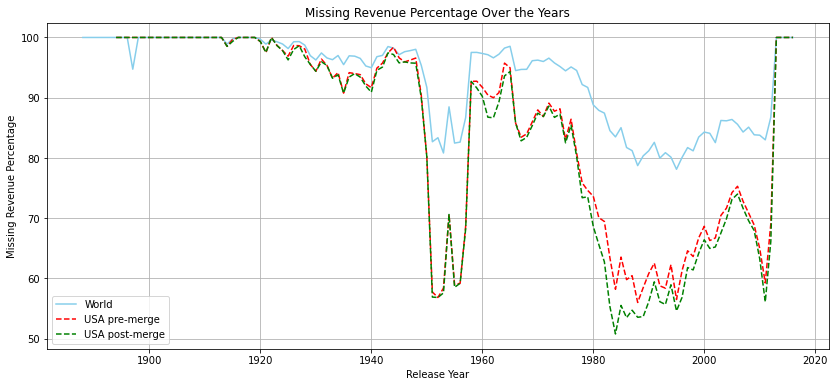

In [45]:
missing_revenue_USA_merge = calculate_missing_percentage(movies2, 'year', 'revenue')

plt.figure(figsize=(14, 6))
plt.plot(missing_revenue_all.index, missing_revenue_all["revenue"], linestyle='-', color='skyblue', label='World')
plt.plot(missing_revenue_USA.index, missing_revenue_USA["revenue"], linestyle='--', color='r', label='USA pre-merge')
plt.plot(missing_revenue_USA_merge.index, missing_revenue_USA_merge["revenue"], linestyle='--', color='g', label='USA post-merge')
plt.xlabel("Release Year")
plt.ylabel("Missing Revenue Percentage")
plt.title("Missing Revenue Percentage Over the Years")
plt.grid()
plt.legend()
plt.show()


It looks better, less data is missing for the revenue !


- Create a dataframe with no missing box office data

In [46]:
movies2_clean = movies2.copy(deep=True)
movies2_clean = movies2.dropna(subset=['revenue']).reset_index(drop=True)

display(movies2_clean.sample(5))
display(movies2_clean.shape)
display(movies2_clean.info())


,id_wiki,id_freebase,name,year,runtime,lang,countries,genres,review,nbr_review,revenue
6228,4415958,/m/0c13gc,Little Secrets,2001,96.0,[English Language],[USA],"[Indie, Family Drama, Comedy-drama, Coming of ...",NaN,NaN,405792.0
4072,2755048,/m/080wgg,Royal Wedding,1951,93.0,[English Language],[USA],"[Romantic comedy, Romance Film, Musical, Comedy]",NaN,NaN,2600000.0
2781,10336502,/m/02q8vkz,Bon Voyage!,1962,132.0,[English Language],[USA],"[Family Film, Drama, Comedy]",NaN,NaN,9230769.0
605,171559,/m/0170yd,Affliction,1998,115.0,[English Language],[USA],"[Crime Fiction, Drama, Indie]",NaN,NaN,6330054.0
2146,4273140,/m/0bth54,Avatar,2009,178.0,"[English Language, Spanish Language]","[USA, United Kingdom]","[Thriller, Science Fiction, Adventure, Compute...",NaN,NaN,2782275172.0


(7285, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_wiki      7285 non-null   int64  
 1   id_freebase  7285 non-null   object 
 2   name         7285 non-null   object 
 3   year         7285 non-null   int32  
 4   runtime      7260 non-null   float64
 5   lang         7285 non-null   object 
 6   countries    7285 non-null   object 
 7   genres       7285 non-null   object 
 8   review       2898 non-null   float64
 9   nbr_review   2898 non-null   float64
 10  revenue      7285 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(6)
memory usage: 597.7+ KB


None

In [47]:
movies2_clean['revenue_part'] = movies2_clean.groupby('year')['revenue'].transform(lambda x: x / x.sum())
 

display(movies2_clean.sample(5))
display(movies2_clean.shape)
display(movies2_clean.info())


,id_wiki,id_freebase,name,year,runtime,lang,countries,genres,review,nbr_review,revenue,revenue_part
4332,4619136,/m/0ccz20,Double Take,2001,91.0,[English Language],[USA],"[Crime Fiction, Action/Adventure, Action, Comedy]",NaN,NaN,31603059.0,0.002231
939,2207640,/m/06v_2g,The Astronaut's Wife,1999,110.0,[English Language],[USA],"[Thriller, Science Fiction, Horror, Indie, Sci...",NaN,NaN,19598588.0,0.001508
1385,1374201,/m/04xnsh,Saving Silverman,2001,93.0,"[English Language, Thai Language]","[USA, Australia]","[Crime Fiction, Romantic comedy, Buddy film, S...",NaN,NaN,26086706.0,0.001842
5302,724258,/m/035w2k,Mission: Impossible,1996,110.0,"[French Language, Czech Language, English Lang...",[USA],"[Thriller, Action/Adventure, Action, Spy]",7.097328,400677.0,457696367.0,0.047556
3334,7845053,/m/026f__m,Meet Dave,2008,90.0,[English Language],[USA],"[Science Fiction, Comedy, Slapstick]",5.000967,39381.0,50822451.0,0.002562


(7285, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7285 entries, 0 to 7284
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_wiki       7285 non-null   int64  
 1   id_freebase   7285 non-null   object 
 2   name          7285 non-null   object 
 3   year          7285 non-null   int32  
 4   runtime       7260 non-null   float64
 5   lang          7285 non-null   object 
 6   countries     7285 non-null   object 
 7   genres        7285 non-null   object 
 8   review        2898 non-null   float64
 9   nbr_review    2898 non-null   float64
 10  revenue       7285 non-null   object 
 11  revenue_part  7285 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 654.6+ KB


None

# 4) Pipeline (naive approach)

In this section, we will provide an example of how we could identify pivotal movies using a relatively simple approach. This part aims to offer insights into the process of recognizing pivotal movies within a dataset.



### a) Analysing a trend: first approach

To effectively identify the 'hype generator,' it's essential to define 'hype' precisely. We have opted to measure hype as the annual percentage change in the production of various movie genres. This approach accounts for the evolving ease of movie production and the resultant increase in the overall number of films produced each year. By focusing on yearly percentage changes, we can effectively neutralize the impact of the growing volume of movie production, ensuring our analysis remains robust and accurate.


Size subset (Teen) 29828


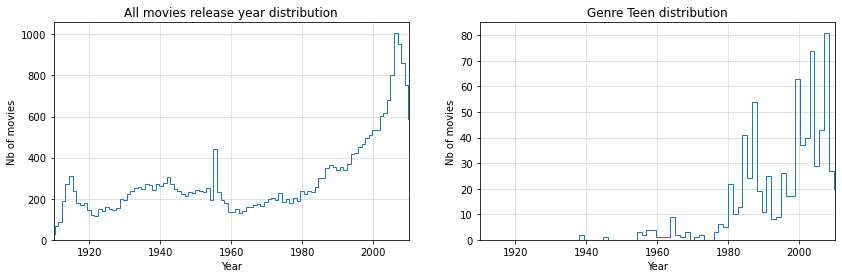

In [48]:
# Create a subset to compare to the whole dataset (here: Teen Movies)
key = 'Teen'
subset = create_subset(movies2, key)
print("Size subset ({}) {}".format(key, len(movies2)))

# Plot release dates distribution
fig, axs = plt.subplots(1, 2, figsize=(14,4))
axs = axs.ravel()

movies.year.hist(bins=movies2.year.nunique(), ax=axs[0], histtype='step')
ax_settings(axs[0], xlabel='Year', ylabel='Nb of movies', title='All movies release year distribution')
axs[0].set_xlim((1910,2010))

subset.year.hist(bins=subset.year.nunique(), ax=axs[1], histtype='step')
ax_settings(axs[1], xlabel='Year', ylabel='Nb of movies', title='Genre {} distribution'.format(key))
axs[1].set_xlim((1910,2010))

plt.show()

This is an early version of the analysis. Here we simply plot the number of movies distribution, but we plan to use the fraction of (subset) movies distribution later for more robust results. However, this already gives us an idea of what we could expect from the data.

We display two graphs above. The left plot is the distribution of movie releases over time. The right plot shows the evolution of number of movies releases over time, of the genre "Teen movie". We immediately notice several elements. First the shapes of the two curves are markedly different, this confirms us that we choose an interesting subset for analysis, since it differs from the baseline. Now by looking more closely, we see that the genre Teen emerged at a certain point in cinema, because (almost) no data exists before late 70's, and we have no record before late 50's. This is very indicating about the existence of a trend ! But we can extract more, we significantly see two bumps in the Teen plot centered around two different decades. Without going much further here, we can already assume that pivotal movies are hiding here...

### b) Evolution of genre between 1990 and 2012

After this initial example, let's delve deeper into the evolution of 15 genres (ranked in popularity for the considered time range, from 15th place to 30th place) across 30 years of cinema. In this analysis, we shift our focus from the raw number of films released to the percentage relative to the total number of films released each year. This perspective provides a more nuanced understanding of the genre distribution over the years.


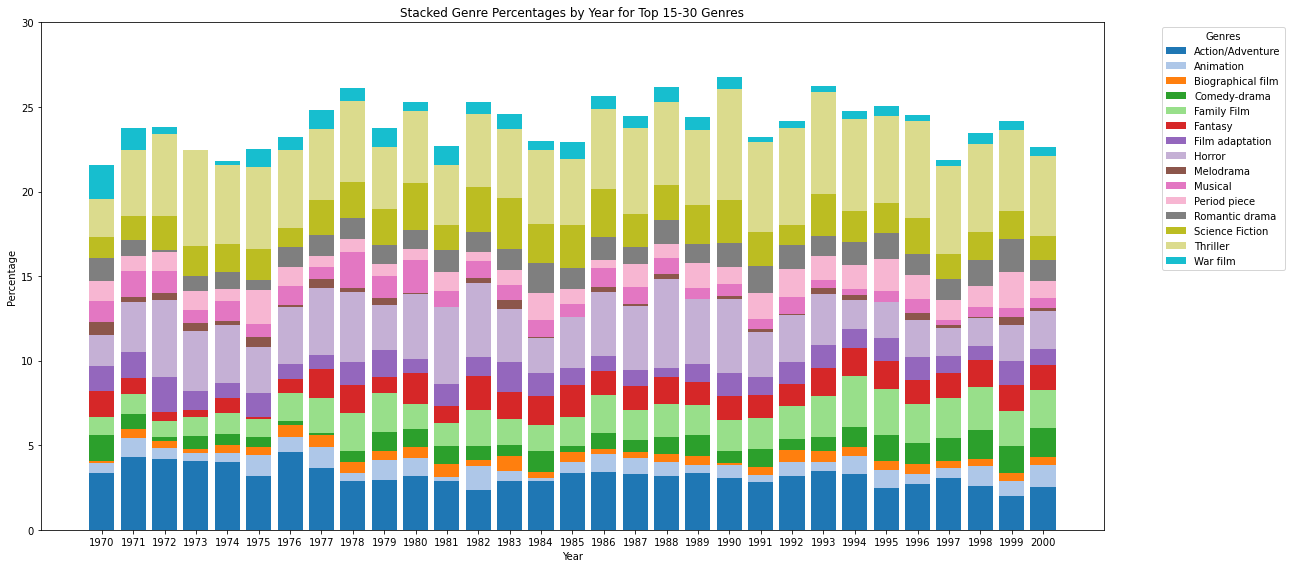

In [49]:
plot_genres_percentages_per_year(movies2, 1970, 2000, 15,30,30)

From the graph above we can for example identify two big varitions in genres 'Biography' in range 1990-1996 and 'Comedy-drama' in range 1978-1983.

We will next focus on identifying the movie that ignited this surge in popularity. By examining films in the pertinent genres and identifying the highest-grossing one in the 5 year prior (based on the assumption that it takes 5 years to produce a movie), we aim to pinpoint the film that was instrumental in boosting the genre's appeal.

- Biography potential hype generator 


In [50]:
biography_film_movies = movies2[movies2['genres'].apply(lambda x: "Biography" in x)] # look for genre: biography film

biography_films_1990_2000 = biography_film_movies[(biography_film_movies['year'] >= 1986)
                                    & (biography_film_movies['year'] <= 1991)]

highest_revenue_movie = biography_films_1990_2000[biography_films_1990_2000['revenue'].notna()].sort_values('revenue', ascending=False).head(4)

display(highest_revenue_movie[["name","year","revenue"]])

,name,year,revenue
23233,JFK,1991,205400000.0
17767,Born on the Fourth of July,1989,196672350.0
27763,The Untouchables,1987,76270454.0
24589,Empire of the Sun,1987,66240000.0


- Comedy drama potential hype generator 


In [51]:
comedy_drama_film_movies = movies2[movies2['genres'].apply(lambda x: "Comedy-drama" in x)] # look for genre: comedy_drama film

comedy_drama_films_1990_2000 = comedy_drama_film_movies[(comedy_drama_film_movies['year'] >= 1973) & (comedy_drama_film_movies['year'] <= 1978)]

highest_revenue_movie = comedy_drama_films_1990_2000[comedy_drama_films_1990_2000['revenue'].notna()].sort_values('revenue', ascending=False).head(4)

display(highest_revenue_movie[["name","year","revenue"]])

,name,year,revenue
2384,American Graffiti,1973,140000000.0
17224,One Flew Over the Cuckoo's Nest,1975,108981275.0
5816,Shampoo,1975,60000000.0
24916,Semi-Tough,1977,37187139.0


In this approach, we identified potential hype generators by looking at films of the same genre that have been released before the trend and generated significant revenues. If we look only at the most revenue generated, the two pivotal movies would be 'JFK' for Biography and 'American Graffiti' for Comedy-drama. However, we see that other movies have a similar order of magnitude of revenue, which hints at the potential limit of this naive approach.


### c) Identification of the trend by looking at the percentage change
Now we want to automate the process recently done with the art movie in order to predict the hype generators:


We will now identify the genre that experienced the highest percentage change in popularity between 1990 and 2013. A significant change in this percentage is indicative of a 'hype' in the genre, revealing shifts in audience and producers preferences and trends during this period.

We now shift our focus to identifying movies that sparked a surge in popularity. Our approach involves examining films within relevant genres and determining the highest-grossing one in the 5 years prior (considering the assumption that movie production takes 5 years, as stated in the README). The chosen genre for popularity is crucial, as it can impact our analysis. Top genres are often too broad and mainstream, while those at the bottom tend to be too specialized and niche. By selecting this middle range, we aim to strike a balance, capturing genres that are neither overly generic nor excessively niche. In the following case we only take the top 15 to top 30 most 

In [52]:
hype_generators(movies,1990,2013,15,30)


Highest change in percentage by genre between 1990 and  2013 (hype))
 index  year            genres  count  percentage  percentage_change
 11269  2011            Action     90    5.747126           0.419290
 11109  2010  Action/Adventure     58    2.552817           0.288349
 11122  2010 Biographical film     20    0.880282           0.967430
  8430  1996            Comedy    147    7.581227           0.272609
 11403  2012       Comedy film     51    6.580645           2.220403
  8452  1996          Disaster      8    0.412584           7.103146
  8118  1994       Documentary     31    1.726058           0.718506
 11311  2011             Drama    218   13.920817           0.245201
 11320  2011           Fantasy     38    2.426564           0.378289
  8667  1997             Indie    118    5.427783           0.547716
  8509  1996             Music     10    0.515730           1.025786
 11236  2010      Romance Film    104    4.577465           0.314026
  8528  1996   Romantic comedy    

This assessment leads to interesting results such as 'Fantasy' associated with *'The Lord of the Rings: The Return of the King'* or 'Science Fiction' and *'Back to the Future'*. However, some results are rising questions on this naive method. For instance, 'Romance Film' associated to *Star Wars Episode II: Attack of the Clones* demonstrates the limit of the actual naive method. In the future we aim to identify more clearly the principal genre of the movie.

<p align="center">
  <img src="img/StarWars.png" width=70%>

### d) Trope Originators

Enclosed is a curated selection of seminal films, each marking the inaugural appearance of a particular trope. These films are esteemed as pivotal within the cinematic world, as they present audiences with the archetype of a character type for the very first time, setting the stage for countless others to follow it.
(Disclaimer: it is from the uncomplete trope dataset, from the course given data). 

In [53]:
summaries, characters, tvtropes, movies_initial_subset = get_initial_data(MOVIES_FOLDER)
trope_originators(tvtropes, movies_initial_subset)

,category,name,date
3,absent_minded_professor,Them!,1954-06-16
6,adventurer_archaeologist,Indiana Jones and the Raiders of the Lost Ark,1981-06-12
14,arrogant_kungfu_guy,Rocky,1976-11-21
26,big_man_on_campus,Can't Hardly Wait,1998-06-12
28,bounty_hunter,The Outlaw Josey Wales,1976-06-30
45,brainless_beauty,Roxanne,1987-06-19
52,broken_bird,Alice in Wonderland,1976-12-10
58,bromantic_foil,Mallrats,1995-10-20
63,bruiser_with_a_soft_center,Casino Royale,1967-01-01
66,bully,A Christmas Story,1983-11-18
